In [1]:
import os
import sys
import pandas as pd

sys.path.append(os.path.abspath('../'))
from mcda.electre.outranking import *
from mcda.plot.plot import *

### Example 1

In [2]:
alternatives = ['ITA', 'BEL', 'GER', 'AUT', 'FRA']

credibility_matrix = pd.DataFrame([
    [1, 0.6, 0.3, 0.7, 0.55],
    [0, 1, 0.2, 0, 0],
    [0.58, 0.6, 1, 0.85, 0],
    [0.3, 0, 0.6, 1, 0.58],
    [0.6, 0, 0.6, 0.7, 1]
], index=alternatives, columns=alternatives)
credibility_matrix

,ITA,BEL,GER,AUT,FRA
ITA,1.00,0.6,0.3,0.70,0.55
BEL,0.00,1.0,0.2,0.00,0.00
GER,0.58,0.6,1.0,0.85,0.00
AUT,0.30,0.0,0.6,1.00,0.58
FRA,0.60,0.0,0.6,0.70,1.00


In [3]:
qualification = alternative_qualities(credibility_matrix)
qualification

(ITA    0
 BEL    0
 GER    1
 AUT   -1
 FRA    0
 dtype: int64,
 0.7)

In [4]:
downward_order = distillation(credibility_matrix)
downward_order

1              [GER]
2              [ITA]
3    [BEL, AUT, FRA]
dtype: object

In [5]:
upward_order = distillation(credibility_matrix, upward_order=True)
upward_order

5    [FRA]
4    [GER]
3    [ITA]
2    [BEL]
1    [AUT]
dtype: object

In [6]:
descending_order_matrix = order_to_outranking_matrix(downward_order)
descending_order_matrix

,GER,ITA,BEL,AUT,FRA
GER,1,1,1,1,1
ITA,0,1,1,1,1
BEL,0,0,1,1,1
AUT,0,0,1,1,1
FRA,0,0,1,1,1


In [7]:
ascending_order_matrix = order_to_outranking_matrix(upward_order)
ascending_order_matrix

,FRA,GER,ITA,BEL,AUT
FRA,1,1,1,1,1
GER,0,1,1,1,1
ITA,0,0,1,1,1
BEL,0,0,0,1,1
AUT,0,0,0,0,1


In [8]:
final_ranking = final_ranking_matrix(descending_order_matrix, ascending_order_matrix)
final_ranking

,AUT,BEL,FRA,GER,ITA
AUT,1,0,0,0,0
BEL,1,1,0,0,0
FRA,1,1,1,0,0
GER,1,1,0,1,1
ITA,1,1,0,0,1


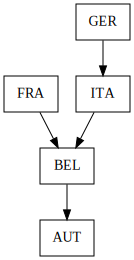

In [9]:
plot = plot_outranking(final_ranking)
plot

In [10]:
ranks_ranking = ranks(final_ranking)
ranks_ranking

1    [FRA, GER]
2         [ITA]
3         [BEL]
4         [AUT]
dtype: object

In [11]:
median_order_ranking = median_order(ranks_ranking, downward_order, upward_order)
median_order_ranking

1    [GER]
2    [FRA]
3    [ITA]
4    [BEL]
5    [AUT]
dtype: object

### Example 2

In [12]:
alternatives = ['P1', 'P2', 'P3', 'P4', 'P5']

credibility_matrix = pd.DataFrame([
    [1, 0, 1, 0.8, 1],
    [0, 1, 0, 0.9, 0.67],
    [0.6, 0, 1, 0.6, 0.8],
    [0.25, 0.8, 0.67, 1, 0.85],
    [0.67, 0, 0.8, 0.8, 1]
], index=alternatives, columns=alternatives)
credibility_matrix

,P1,P2,P3,P4,P5
P1,1.00,0.0,1.00,0.8,1.00
P2,0.00,1.0,0.00,0.9,0.67
P3,0.60,0.0,1.00,0.6,0.80
P4,0.25,0.8,0.67,1.0,0.85
P5,0.67,0.0,0.80,0.8,1.00


In [13]:
qualification = alternative_qualities(credibility_matrix)
qualification

(P1    2
 P2    0
 P3   -1
 P4    0
 P5   -1
 dtype: int64,
 0.8)

In [14]:
downward_order = distillation(credibility_matrix)
downward_order

1            [P1]
2            [P2]
3    [P3, P4, P5]
dtype: object

In [15]:
upward_order = distillation(credibility_matrix, upward_order=True)
upward_order

3    [P1, P2]
2        [P4]
1    [P3, P5]
dtype: object

In [16]:
descending_order_matrix = order_to_outranking_matrix(downward_order)
ascending_order_matrix = order_to_outranking_matrix(upward_order)

In [17]:
final_ranking = final_ranking_matrix(descending_order_matrix, ascending_order_matrix)
final_ranking

,P1,P2,P3,P4,P5
P1,1,1,1,1,1
P2,0,1,1,1,1
P3,0,0,1,0,1
P4,0,0,1,1,1
P5,0,0,1,0,1


In [18]:
plot = plot_outranking(final_ranking)
plot

/home/apralat/Projects/Studies/Engineering Thesis/ELECTRE-Methods/mcda/plot/plot.py:33: UserWarning: Directed Acyclic Graph required for transitive_reduction
  warnings.warn("Directed Acyclic Graph required for transitive_reduction")


In [19]:
ranks_ranking = ranks(final_ranking)
ranks_ranking

1        [P1]
2        [P2]
3        [P4]
4    [P3, P5]
dtype: object

In [20]:
median_order_ranking = median_order(ranks_ranking, downward_order, upward_order)
median_order_ranking

1        [P1]
2        [P2]
3        [P4]
4    [P3, P5]
dtype: object